In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv("../data/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
df.describe(include="all")


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
count,9800.000000,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9789.000000,9800,9800,9800,9800,9800,9800.000000
unique,NaN,4922,1230,1326,4,793,793,3,1,529,49,NaN,4,1861,3,17,1849,NaN
top,NaN,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN
freq,NaN,14,38,34,5859,35,35,5101,9800,891,1946,NaN,3140,19,5909,1492,47,NaN
mean,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55273.322403,NaN,NaN,NaN,NaN,NaN,230.769059
std,2829.160653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32041.223413,NaN,NaN,NaN,NaN,NaN,626.651875
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000
25%,2450.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.248000
50%,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58103.000000,NaN,NaN,NaN,NaN,NaN,54.490000
75%,7350.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,210.605000


In [6]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

Postal Code    11
dtype: int64

In [8]:
# Check total duplicates
print("Duplicate rows:", df.duplicated().sum())

# Check duplicates by Order ID + Product ID
dupes = df[df.duplicated(subset=["Order ID", "Product ID"], keep=False)]
dupes.sort_values(by="Order ID").head(10)

Duplicate rows: 0


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
6498,6499,CA-2016-103135,24/07/2016,28/07/2016,Standard Class,SS-20515,Shirley Schmidt,Home Office,United States,Louisville,Kentucky,40214.0,South,OFF-BI-10000069,Office Supplies,Binders,"GBC Prepunched Paper, 19-Hole, for Binding Sys...",135.090
6500,6501,CA-2016-103135,24/07/2016,28/07/2016,Standard Class,SS-20515,Shirley Schmidt,Home Office,United States,Louisville,Kentucky,40214.0,South,OFF-BI-10000069,Office Supplies,Binders,"GBC Prepunched Paper, 19-Hole, for Binding Sys...",90.060
350,351,CA-2017-129714,01/09/2017,03/09/2017,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,New York,10009.0,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,24.560
352,353,CA-2017-129714,01/09/2017,03/09/2017,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,New York,10009.0,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,49.120
1300,1301,CA-2017-137043,23/12/2017,25/12/2017,Second Class,LC-17140,Logan Currie,Consumer,United States,Springfield,Virginia,22153.0,South,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",572.760
1301,1302,CA-2017-137043,23/12/2017,25/12/2017,Second Class,LC-17140,Logan Currie,Consumer,United States,Springfield,Virginia,22153.0,South,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",286.380
9168,9169,CA-2017-140571,15/03/2017,19/03/2017,Standard Class,SJ-20125,Sanjit Jacobs,Home Office,United States,Jackson,Mississippi,39212.0,South,OFF-PA-10001954,Office Supplies,Paper,Xerox 1964,319.760
9169,9170,CA-2017-140571,15/03/2017,19/03/2017,Standard Class,SJ-20125,Sanjit Jacobs,Home Office,United States,Jackson,Mississippi,39212.0,South,OFF-PA-10001954,Office Supplies,Paper,Xerox 1964,45.680
7881,7882,CA-2018-118017,03/12/2018,06/12/2018,Second Class,LC-16870,Lena Cacioppo,Consumer,United States,Thornton,Colorado,80229.0,West,TEC-AC-10002006,Technology,Accessories,Memorex Micro Travel Drive 16 GB,76.752
7882,7883,CA-2018-118017,03/12/2018,06/12/2018,Second Class,LC-16870,Lena Cacioppo,Consumer,United States,Thornton,Colorado,80229.0,West,TEC-AC-10002006,Technology,Accessories,Memorex Micro Travel Drive 16 GB,102.336


In [9]:
# Convert to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors="coerce")

In [10]:
# Check invalids
print("Invalid Order Dates:", df["Order Date"].isna().sum())
print("Invalid Ship Dates:", df["Ship Date"].isna().sum())

Invalid Order Dates: 5841
Invalid Ship Dates: 5985


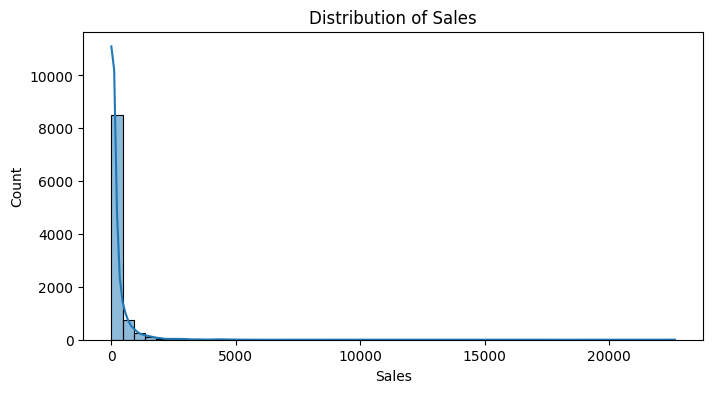

Negative Sales: 0
High-value Sales (top 1%):


np.float64(2480.2078000000056)

In [11]:
#Sales distribution
plt.figure(figsize=(8,4))
sns.histplot(df["Sales"], bins=50, kde=True)
plt.title("Distribution of Sales")
plt.show()

# Outliers
print("Negative Sales:", (df["Sales"] < 0).sum())
print("High-value Sales (top 1%):")
df["Sales"].quantile(0.99)


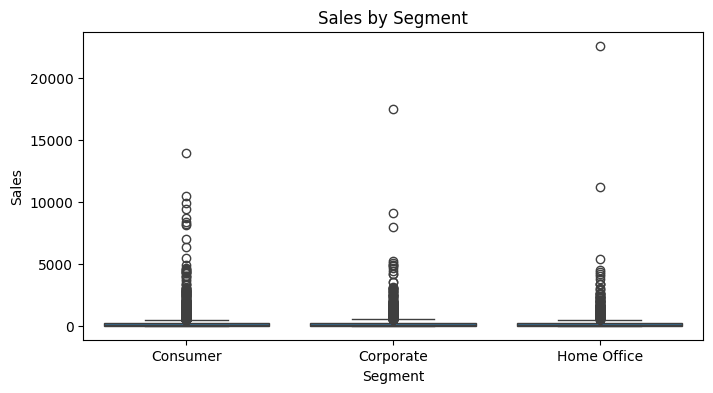

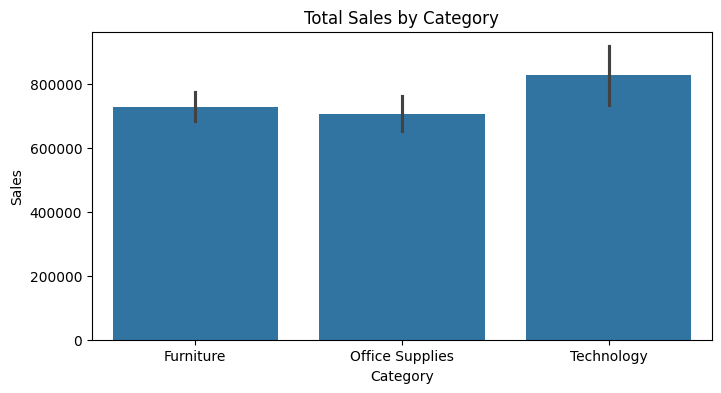

In [15]:
#Category & Segment
plt.figure(figsize=(8,4))
sns.boxplot(x="Segment", y="Sales", data=df)
plt.title("Sales by Segment")
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x="Category", y="Sales", data=df, estimator=sum)
plt.title("Total Sales by Category")
plt.show()


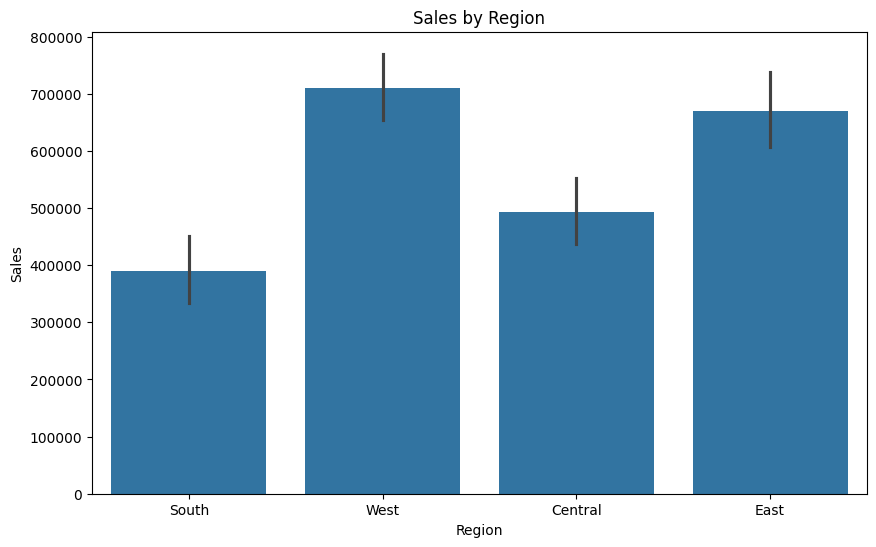

City
New York City    252462.5470
Los Angeles      173420.1810
Seattle          116106.3220
San Francisco    109041.1200
Philadelphia     108841.7490
Houston           63956.1428
Chicago           47820.1330
San Diego         47521.0290
Jacksonville      44713.1830
Detroit           42446.9440
Name: Sales, dtype: float64

In [16]:
#Regional Analysis
plt.figure(figsize=(10,6))
sns.barplot(x="Region", y="Sales", data=df, estimator=sum)
plt.title("Sales by Region")
plt.show()

# Top cities
df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)


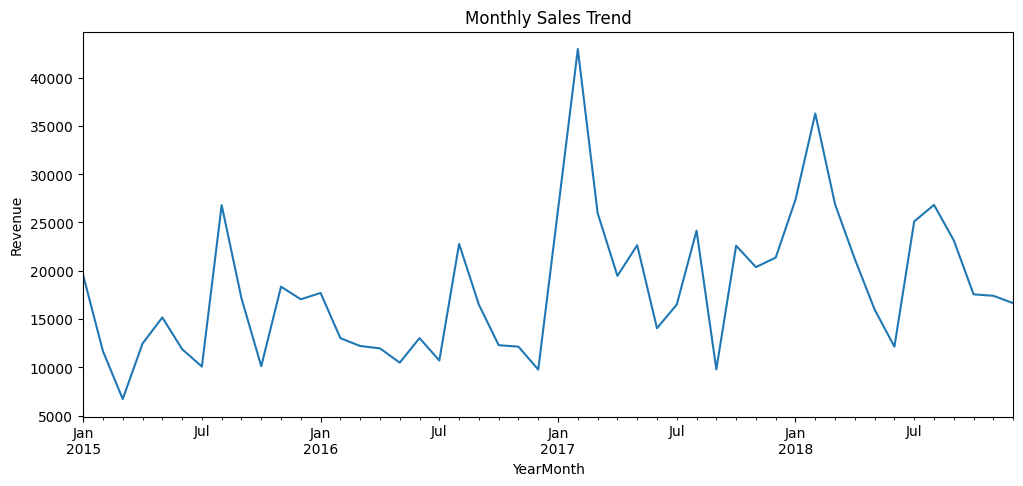

In [17]:
#Time Trends
df["YearMonth"] = df["Order Date"].dt.to_period("M")
sales_trend = df.groupby("YearMonth")["Sales"].sum()

plt.figure(figsize=(12,5))
sales_trend.plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue")
plt.show()


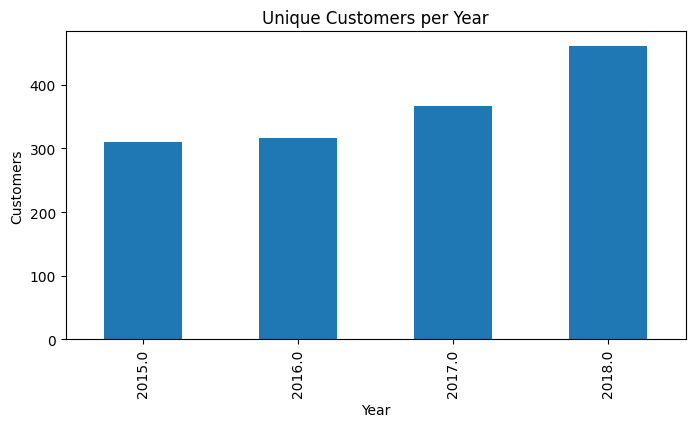

In [18]:
#Retention Signals
# Count unique customers per year
df["Year"] = df["Order Date"].dt.year
customer_trend = df.groupby("Year")["Customer ID"].nunique()

plt.figure(figsize=(8,4))
customer_trend.plot(kind="bar")
plt.title("Unique Customers per Year")
plt.ylabel("Customers")
plt.show()